# Kickstarter Project Statistics

### Selena Flannery -- November 16, 2016

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

Manually create a gradient descent.

In [2]:
def step_gradient(m, b, data, x, y, learning_rate):
    N = len(data)
        
    m_grad = -(2/N) * (data[x] * (data[y] - (m * data[x] + b))).sum()
    b_grad = -(2/N) * (data[y] - (m * data[x] + b)).sum()
    
    new_m = m - (learning_rate * m_grad)
    new_b = b - (learning_rate * b_grad)

    return new_m, new_b

def gradient_descent(data, x, y, learning_rate=.01, steps=1000):
    b, m = random.randint(0, 100), random.randint(0, 1000)
    for _ in range(steps):
        m, b = step_gradient(m, b, data, x, y, learning_rate)
    return m, b

In [3]:
kickstarter = pd.read_csv("data/most_backed.csv")
kickstarter.columns

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url'],
      dtype='object')

## Amount Pledged & Number of Backers

In [4]:
x = "num.backers"
y = "amt.pledged"

### Initial Visualization

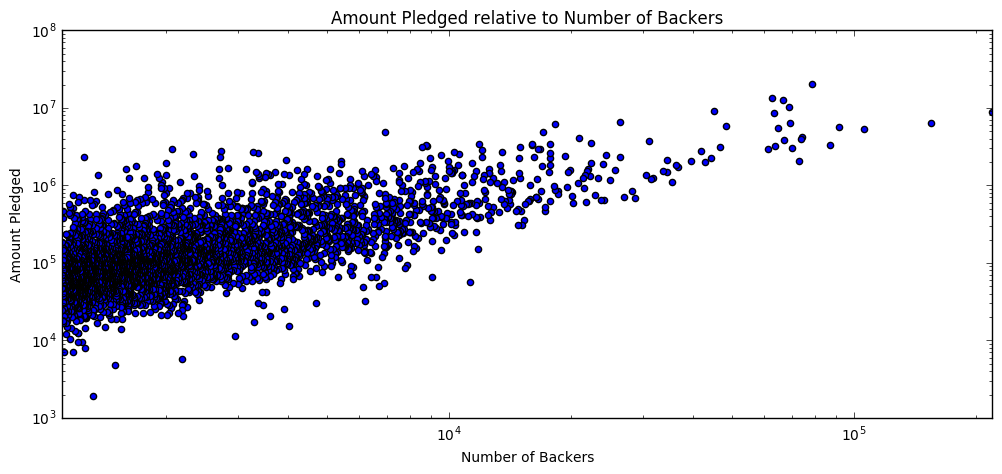

In [5]:
plt.figure(figsize=(12,5))
plt.scatter(kickstarter[x], kickstarter[y])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, max(kickstarter[x]))
plt.title("Amount Pledged relative to Number of Backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

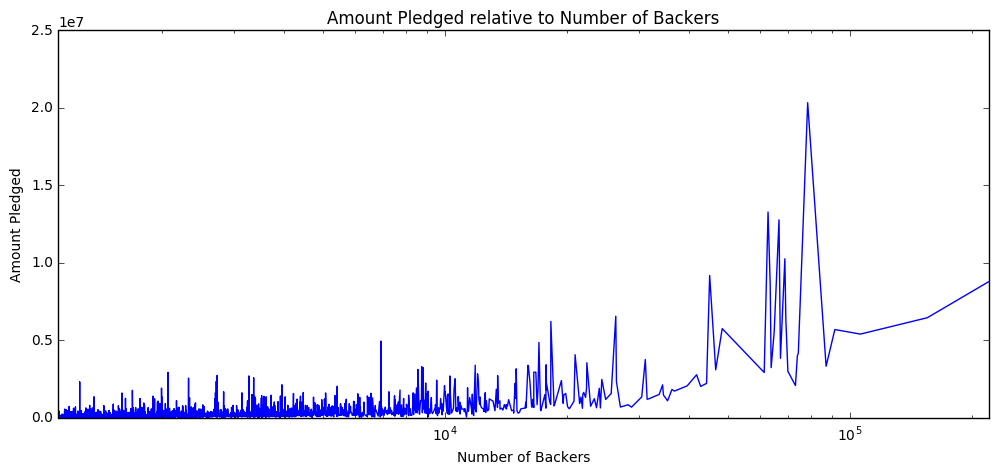

In [6]:
plt.figure(figsize=(12,5))
plt.plot(kickstarter[x], kickstarter[y])
plt.xscale('log')
plt.xlim(0, max(kickstarter[x]))
plt.title("Amount Pledged relative to Number of Backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

### Find Best Fit

In [7]:
# m, b = gradient_descent(kickstarter, x, y, steps=1000)
# print(m, b)

The above commented out code returns increasingly large numbers and does not work.

The data is linear in log space. Every time I run the gradient descent on this data set, my numbers get rapidly larger. This particular attempt at a model does not seem to be appropriate for this data

### Best Fit with SciKit Learn

In [27]:
r = LinearRegression()
r.fit(kickstarter[x].reshape(-1, 1), kickstarter[y].reshape(-1, 1))
m = r.coef_
b = r.intercept_
prediction = r.predict(kickstarter[x].reshape(-1, 1))
m, b, prediction

(array([[ 69.85916512]]),
 array([ 39695.61062212]),
 array([[ 15365538.97323411],
        [ 10862696.62618413],
        [  7434777.25285356],
        ..., 
        [   117169.4247415 ],
        [   117169.4247415 ],
        [   117169.4247415 ]]))

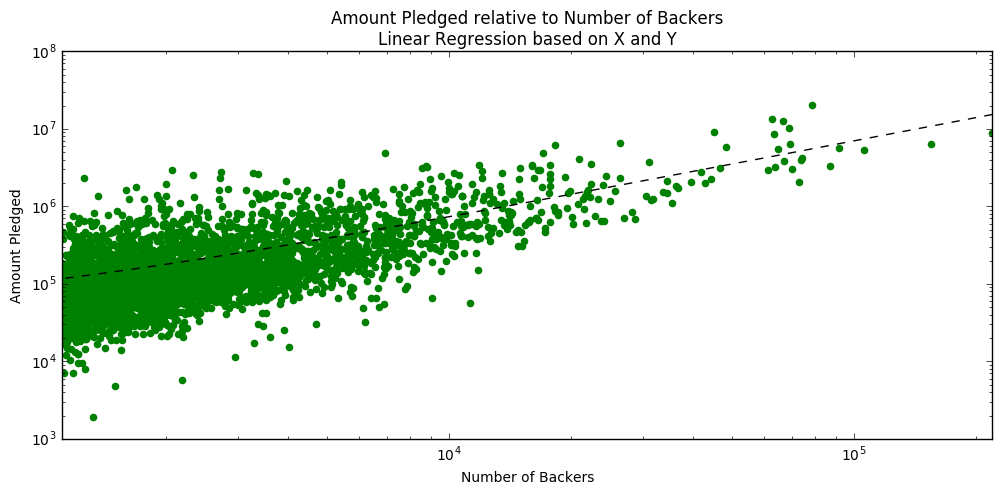

In [30]:
plt.figure(figsize=(12,5))
plt.scatter(kickstarter[x], kickstarter[y], color="green")
plt.plot(kickstarter[x], prediction, color="black", linestyle="--")
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, max(kickstarter[x]))
plt.title("Amount Pledged relative to Number of Backers\nLinear Regression based on X and Y")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

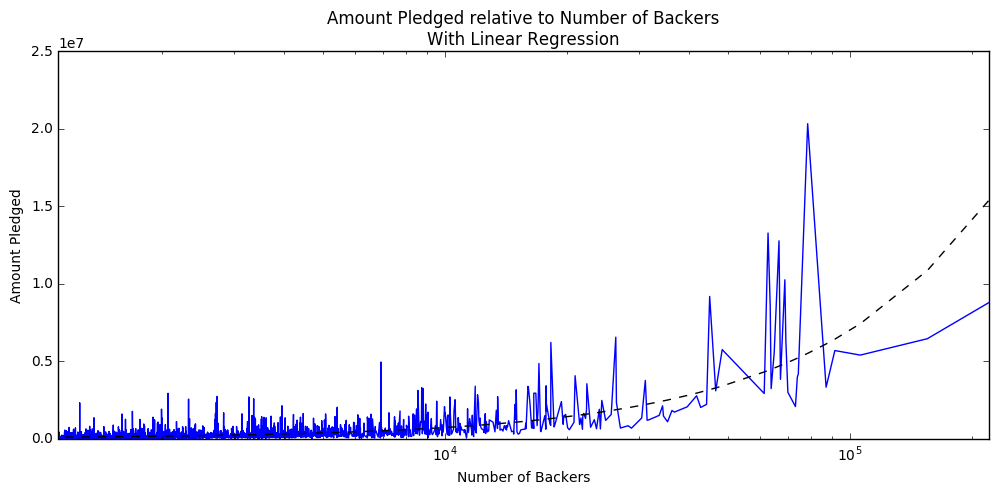

In [31]:
plt.figure(figsize=(12,5))
plt.plot(kickstarter[x], kickstarter[y])
plt.plot(kickstarter[x], prediction, color="black", linestyle="--")
plt.xscale('log')
plt.xlim(0, max(kickstarter[x]))
plt.title("Amount Pledged relative to Number of Backers\nWith Linear Regression")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

## Goal & Number of Backers

In [37]:
x = "goal"
y = "num.backers"

### Initial Visualization

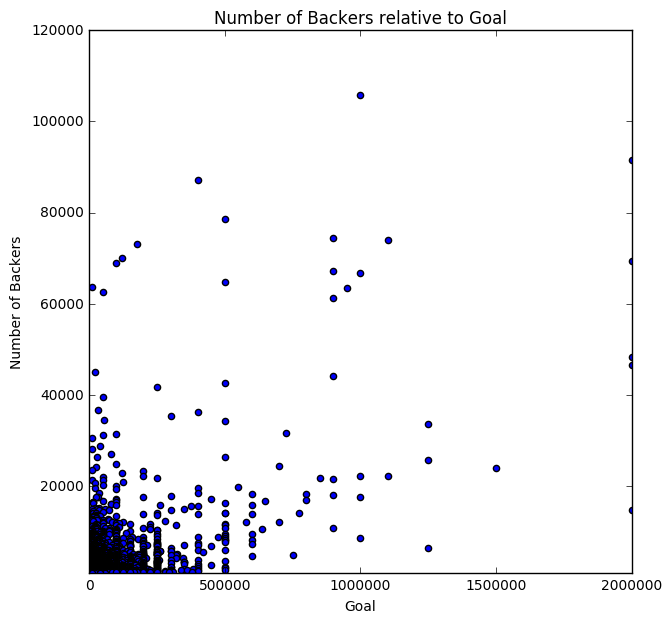

In [38]:
plt.figure(figsize=(7, 7))
plt.scatter(kickstarter[x], kickstarter[y])
plt.xlim(0, max(kickstarter[x]))
plt.ylim(min(kickstarter[y]), 120000)
plt.title("Number of Backers relative to Goal")
plt.xlabel("Goal")
plt.ylabel("Number of Backers")
plt.show()

This data if rife with outliers, and it is quite hard to get a sense of the relationship.

From the looks of it, a higher goal (above 1000000) doesn't seem to gather more backers.
My initial assumptions are that when a goal is substantial but not overwhelmingly high, it recieves a higher number of backers. I do not yet have the appropriate data visualization to fully support this.

### Linear Regression Model

In [35]:
goal_backers_r = LinearRegression()
goal_backers_r.fit(kickstarter[x].reshape(-1, 1), kickstarter[y].reshape(-1, 1))
m = goal_backers_r.coef_
b = goal_backers_r.intercept_
prediction = goal_backers_r.predict(kickstarter[x].reshape(-1, 1))
m, b, prediction

(array([[ 0.02567779]]), array([ 1997.22006855]), array([[  2253.9979546 ],
        [  2382.38689763],
        [ 27675.00867443],
        ..., 
        [  2510.77584066],
        [  3024.33161278],
        [  2253.9979546 ]]))

### Visualization with Linear Model

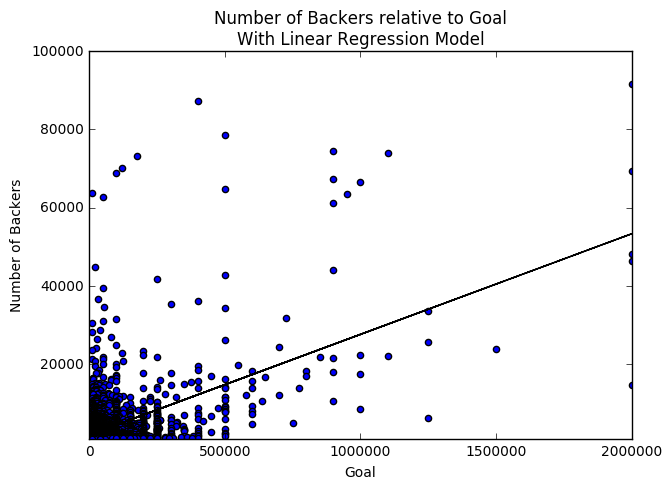

In [41]:
plt.figure(figsize=(7, 5))
plt.scatter(kickstarter[x], kickstarter[y])
plt.plot(kickstarter[x], prediction, color="black", linestyle="--")
plt.xlim(0, max(kickstarter[x]))
plt.ylim(min(kickstarter[y]), 100000)
plt.title("Number of Backers relative to Goal\nWith Linear Regression Model")
plt.xlabel("Goal")
plt.ylabel("Number of Backers")
plt.show()

From this visualization, it appears that the number of backers and the goal have a simple linear relationship.

## Backers and Amt Pledged: Types of Projects

Here we will explore the relationship between backers and amount pledged for each type of project:  “Hardware” projects, “Documentary” projects, “Gadgets”, and “Wearables”.

In [43]:
y = "amt.pledged"
x = "num.backers"

### Documentaries

In [44]:
docs = kickstarter[["amt.pledged", "num.backers"]][kickstarter["category"] == "Documentary"]
docs_r = LinearRegression()
docs_r.fit(docs[x].reshape(-1, 1), docs[y].reshape(-1, 1))
docs_prediction = docs_r.predict(docs[x].reshape(-1, 1))

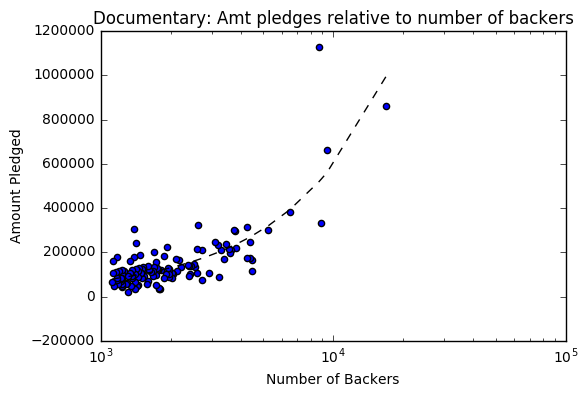

In [45]:
plt.scatter(docs[x], docs[y])
plt.plot(docs[x], docs_prediction, color="black", linestyle="--")
plt.xscale("log")
plt.title("Documentary: Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

### Gadgets

In [46]:
gadgets = kickstarter[["amt.pledged", "num.backers"]][kickstarter["category"] == "Gadgets"]
gad_r = LinearRegression()
gad_r.fit(gadgets[x].reshape(-1, 1), gadgets[y].reshape(-1, 1))
gad_prediction = gad_r.predict(gadgets[x].reshape(-1, 1))

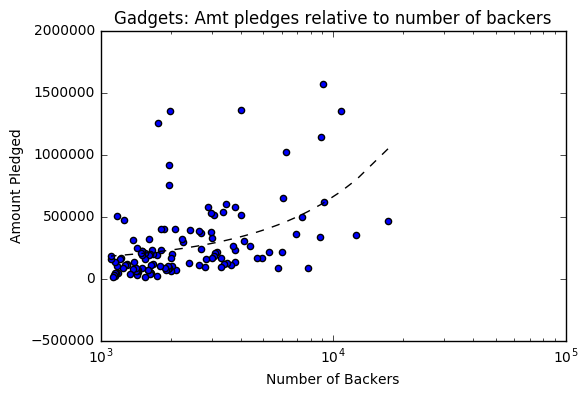

In [48]:
plt.scatter(gadgets[x], gadgets[y])
plt.plot(gadgets[x], gad_prediction, color="black", linestyle="--")
plt.xscale("log")
plt.title("Gadgets: Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

### Wearables

In [49]:
wearables = kickstarter[["amt.pledged", "num.backers"]][kickstarter["category"] == "Wearables"]
wear_r = LinearRegression()
wear_r.fit(wearables[x].reshape(-1, 1), wearables[y].reshape(-1, 1))
wear_prediction = wear_r.predict(wearables[x].reshape(-1, 1))

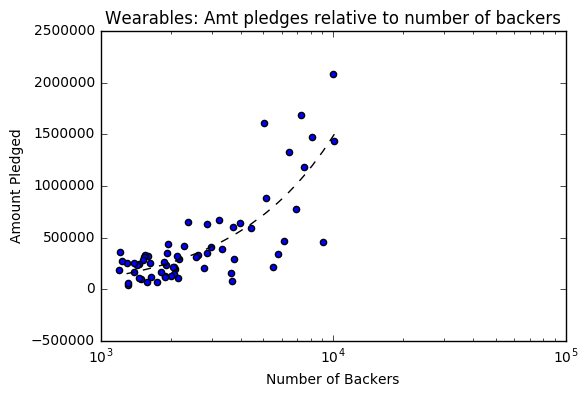

In [50]:
plt.scatter(wearables[x], wearables[y])
plt.plot(wearables[x], wear_prediction, color="black", linestyle="--")
plt.xscale("log")
plt.title("Wearables: Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

## All Together

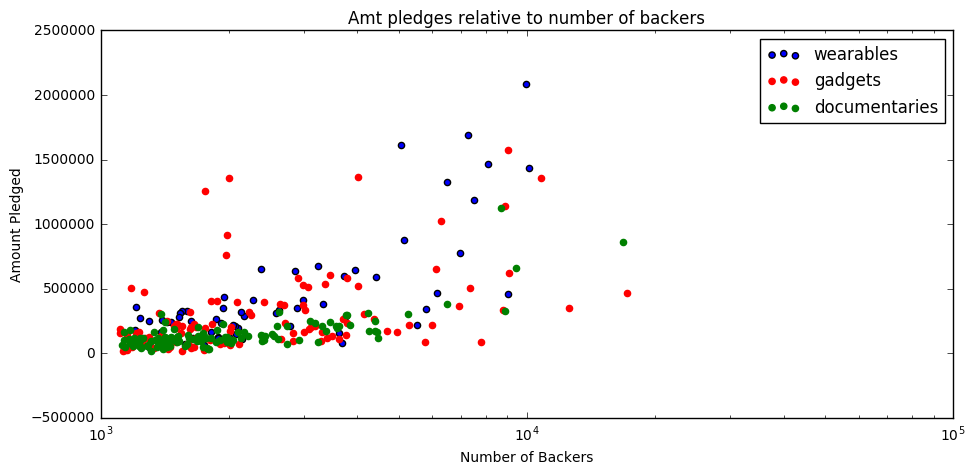

In [19]:
plt.figure(figsize=(11, 5))
plt.scatter(wearables[x], wearables[y], label="wearables")
plt.scatter(gadgets[x], gadgets[y], color="red", label="gadgets")
plt.scatter(docs[x], docs[y], color="green", label="documentaries")
plt.legend()
plt.xscale("log")
plt.title("Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

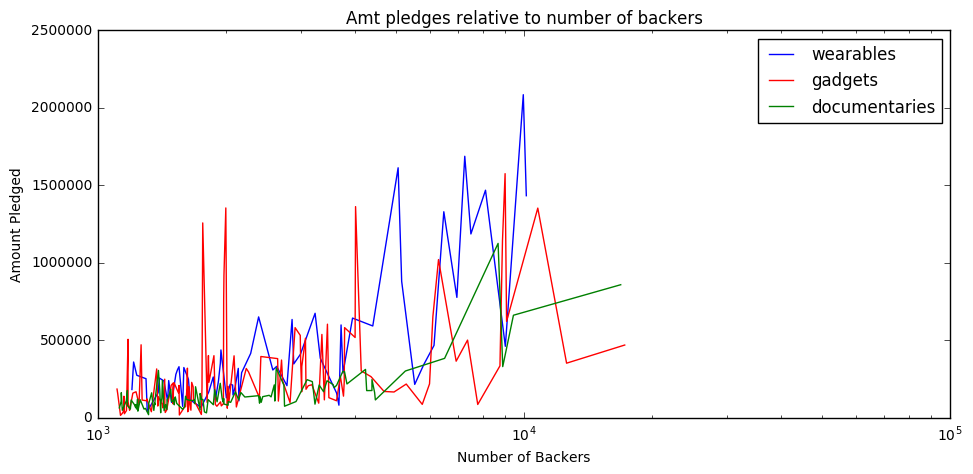

In [20]:
plt.figure(figsize=(11, 5))
plt.plot(wearables[x], wearables[y], label="wearables")
plt.plot(gadgets[x], gadgets[y], color="red", label="gadgets")
plt.plot(docs[x], docs[y], color="green", label="documentaries")
plt.legend()
plt.xscale("log")
plt.title("Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

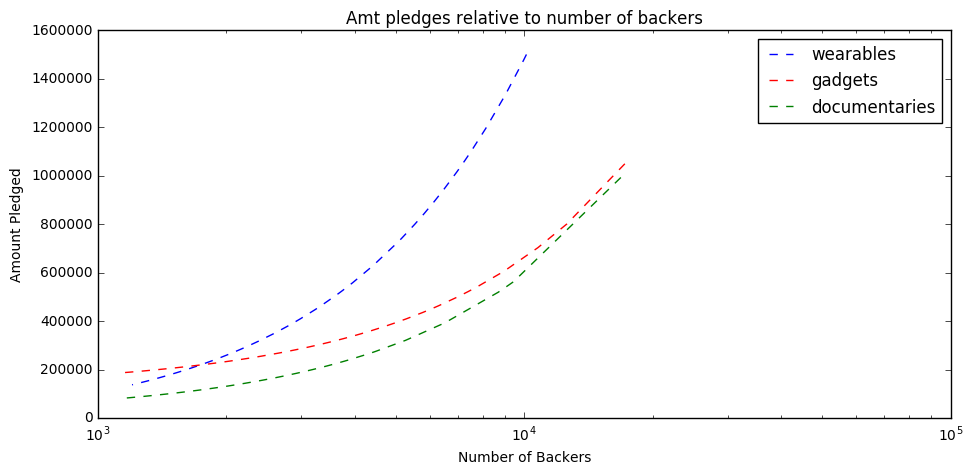

In [51]:
plt.figure(figsize=(11, 5))
plt.plot(wearables[x], wear_prediction, linestyle="--", label="wearables")
plt.plot(gadgets[x], gad_prediction, color="red", linestyle="--", label="gadgets")
plt.plot(docs[x], docs_prediction, color="green", linestyle="--", label="documentaries")
plt.legend()
plt.xscale("log")
plt.title("Amt pledges relative to number of backers")
plt.xlabel("Number of Backers")
plt.ylabel("Amount Pledged")
plt.show()

From the looks of this data, it seems like individual backers contribute more to gadgets and less to documentaries, but that when there are a large number of backers more money is pledged to wearables than the other two categories.